# Laboratory session 07

 Capettini Hilario (Matricola N. 2013031)

In [30]:
library("tibble")
library("tidyverse")
library("magrittr")
library(Bolstad2)
library(showtext)
showtext_auto()

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

## Exercise 1

-  a well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.

-  A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of $n = 75$ patients known to have the disease is screened using the new method.


###  what is the probability distribution of y, the number of times the new method fails to detect the disease ?


The binomial distribution is the discrete probability distribution of the number of successes in a sequence of $n$ INDEPENDENT experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success or failure.

###  on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?

As presented during the lessons, in the frequentist approach, an unbiased estimator for the binomial distribution is $$p_F = \frac{y}{n}$$ where $y$ is the number of successes in $n$ trials. Furthermore the properties of this estimators are: 

$$E[p_F]= p$$ 

$$Var[p_F]=\frac{pq}{n}$$ 

$$MSE[p_F] = Bias[p_F,p]^2 + Var[p_F] = \frac{pq}{n}$$

In [44]:
y <- 6
n <- 75
estimator <- y/n

print(paste("The frequentist estimator of the failure probability of the new method is",estimator))

[1] "The frequentist estimator of the failure probability of the new method is 0.08"


### setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance


The relation between the beta distribution parameters $\alpha$ and $\beta$ and the distribution mean and standard deviation is known to be:

$$\mu= \frac{\alpha}{\alpha + \beta}$$

$$\sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta +1)}$$

those two relation can be easily inverted to obtain the parameters given certain values for the mean and the standard deviation

$$\alpha = \left[\frac{\mu(1-\mu)}{\sigma^2}-1 \right]\mu$$

$$\beta = \alpha \left(\frac{1}{\mu}-1\right)$$

In [45]:
prior_mean <- 0.15
prior_std  <- 0.14
alpha <-(prior_mean * (1-prior_mean) / prior_std**2 -1) * prior_mean
beta  <-alpha * (1/prior_mean -1)


p <- seq(0,1,0.001)
prior <- dbeta(p,alpha,beta)

n <- 75
y <- 6

likelihood  <-  dbinom(x = y, size = n, prob = p)

posterior <- prior * likelihood  
posterior <- posterior/ sintegral(p,posterior)$int

dprior <- data.frame(p, prior,likelihood,posterior)



As we know for this case the posterior can be obtained analytically and it is again a beta distribution with parameters $\alpha'= \alpha +y $ and $\beta' = \beta+n-y$. Given these parameters we can obtain the posterior mean and standard deviation.

In [46]:
alpha_p <- alpha + y
beta_p  <- beta + n - y
posterior_mean      <- (alpha_p) / (alpha_p + beta_p)
posterior_variance  <-  (alpha_p*beta_p)/((alpha_p+beta_p)**2 * (alpha_p+beta_p+1))

In [49]:
posterior_mean;posterior_variance

[1] 0.08478674

[1] 0.0009520625

Warning message:
“Removed 800 row(s) containing missing values (geom_path).”Warning message:
“Removed 801 row(s) containing missing values (geom_path).”

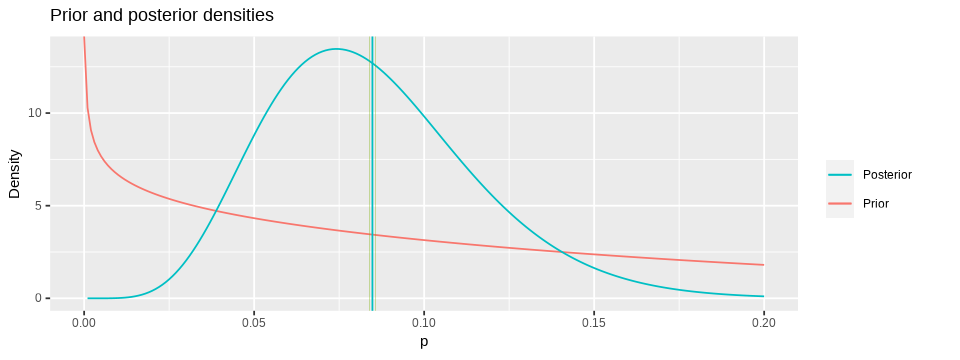

In [116]:
set_plot_dimensions(8, 3)
colors <- c('Prior' = "#F8766D", 'Likelihood' = "#7CAE00", 'Posterior' = "#00BFC4")

ggplot(dprior, aes(x = p)) +
    geom_line (aes(y = prior, color = 'Prior')) +
   # geom_line (aes(y = likelihood, color = 'Likelihood')) +
    geom_line (aes(y = posterior, color = 'Posterior')) +
    geom_vline(xintercept = posterior_mean, color="#00BFC4", size = 0.5)+
    geom_vline(xintercept = posterior_mean+posterior_variance, color="#7CAE00", size = 0.1)+
    geom_vline(xintercept = posterior_mean-posterior_variance, color="#7CAE00", size = 0.1)+
    xlim(0,0.20)+
    labs(title ="Prior and posterior densities",
         x = "p",
         y = "Density",
         color = "") +
    scale_color_manual(values = colors)

In [78]:
print(paste("Te mean value for the posterior is ",sprintf("%.4f",posterior_mean),
            "with a variance of",sprintf("%1.2E",posterior_variance)))

[1] "Te mean value for the posterior is  0.0848 with a variance of 9.52E-04"


###  Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.


we wish to test $$H_0\,:\, P_{UNIPD} \leq P_{OLD}$$ at a level of significance $\alpha=0.05$.

For this purpose we integrate the posterior $$P(H_0: P_{UNIPD}\,\leq \, P_{OLD}|y) = \int_{0}^{P_{OLD}} g(p\,|\,y)\,dp $$

In [124]:
p_old <- 0.15
alpha <- 0.05

posterior_integral  <- sintegral(p,posterior)

d  <- abs(u$y-0.15)                       #Just a trick to convert our area of interest into a trackleable minimum
estimation <-u$x[max((1:length(u$y))[d==min(d)])]
estimation

[1] 0.0533951

In [126]:
if (estimation < alpha){
    print(paste("The result",sprintf("%.4f",estimation),"is higher than alpha =",alpha,"therefore we cannot reject the null hypothesis at",
           alpha * 100,"% level of significance."))
    
}else{print(paste("The result",sprintf("%.4f",estimation),"is lower than alpha =",alpha,"therefore we reject the null hypothesis at",
           alpha*100,"% level of significance."))}



[1] "The result 0.0534 is lower than alpha = 0.05 therefore we reject the null hypothesis at 5 % level of significance."


###  Perform the same hypothesis test in the classical frequentist way.


In [120]:
#
binom.test(x=y, n=n, p=0.15)



	Exact binomial test

data:  y and n
number of successes = 6, number of trials = 75, p-value = 0.1047
alternative hypothesis: true probability of success is not equal to 0.15
95 percent confidence interval:
 0.02992514 0.16603687
sample estimates:
probability of success 
                  0.08 


In [112]:
?binom.test

## Exercise 2

- Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.
 
- Considering the following to sets of observations taken over a fixed large time interval in two different corps:

<table>
  <tr>
    <td> y death soldiers;</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>$\gt 5$</td>
  </tr>
  <tr>
    <td>$n_1$ observations</td>
    <td>109</td>
    <td>65</td>
    <td>22</td>
    <td>3</td>
    <td>1</td>
    <td>$0$</td>
  </tr>
  <tr>
    <td>$n_2$ observations</td>
    <td>144</td>
    <td>91</td>
    <td>32</td>
    <td>11</td>
    <td>2</td>
    <td>$0$</td>
  </tr>
</table>
 

###  assuming a uniform prior, compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.


###  assuming now a Jeffreys’ prior, $$ g(\lambda) \propto 1/\sqrt{\lambda}, \; with \; \lambda \lt 0$$  compute and plot the posterior distribution for λ, the death rate over the measurement time.  Determine the posterior mean, median and variance, and compute the 95% credibility interval.



##  Exercise 3

- A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. $n = 116$ samples were taken from streams having a high environmental impact on pandas. Out of these, $y = 11$ had a high bacter X level.

- indicating with $p$ the probability that a sample of water taken from the stream has a high bacter X level,


###  find the frequentist estimator for $p$


### using a $\texttt{Beta}(1, 10)$ prior for $p$, calculate and posterior distribution $P (p|y)$


###  find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval


###  test the hypotesis $$H_o : p = 0.1 \; \text{versus} \; H_1 : p \neq0.1$$ at 5% level of significance with both the frequentist and bayesian approach

-  a new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter X level


### find the frequentist estimator for p


###  find a bayesian estimator for $p$, assuming both a $Beta(1, 10)$ prior for $p$, and assuming the posterior probability of the older measurement as the prior for the new one.


### find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval
 

###  test the hypotesis $$H_o : p = 0.1 \; \text{versus} \; H_1 : p \neq0.1$$ at 5% level of significance with both the frequentist and bayesian approach

